# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv('demo01_salvo.csv')
df.head(10)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
7,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
8,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False
9,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False


In [7]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [8]:
# 2. Remover valores ausentes
df = df.dropna()

# 3. Converter variáveis categóricas (strings) em variáveis dummies (0/1)
df_dummies = pd.get_dummies(df, drop_first=True)

# 4. Separar variável resposta (y) e variáveis explicativas (X)
y = df_dummies['mau'].astype(int)
X = df_dummies.drop('mau', axis=1)

# 5. Dividir em treino e validação (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Exibir formatos dos dados divididos
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)

X_train: (11655, 28)
X_valid: (4995, 28)
y_train: (11655,)
y_valid: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [50]:
# 1) Definir o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)
# 2) Treinar o modelo
modelo_arvore.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

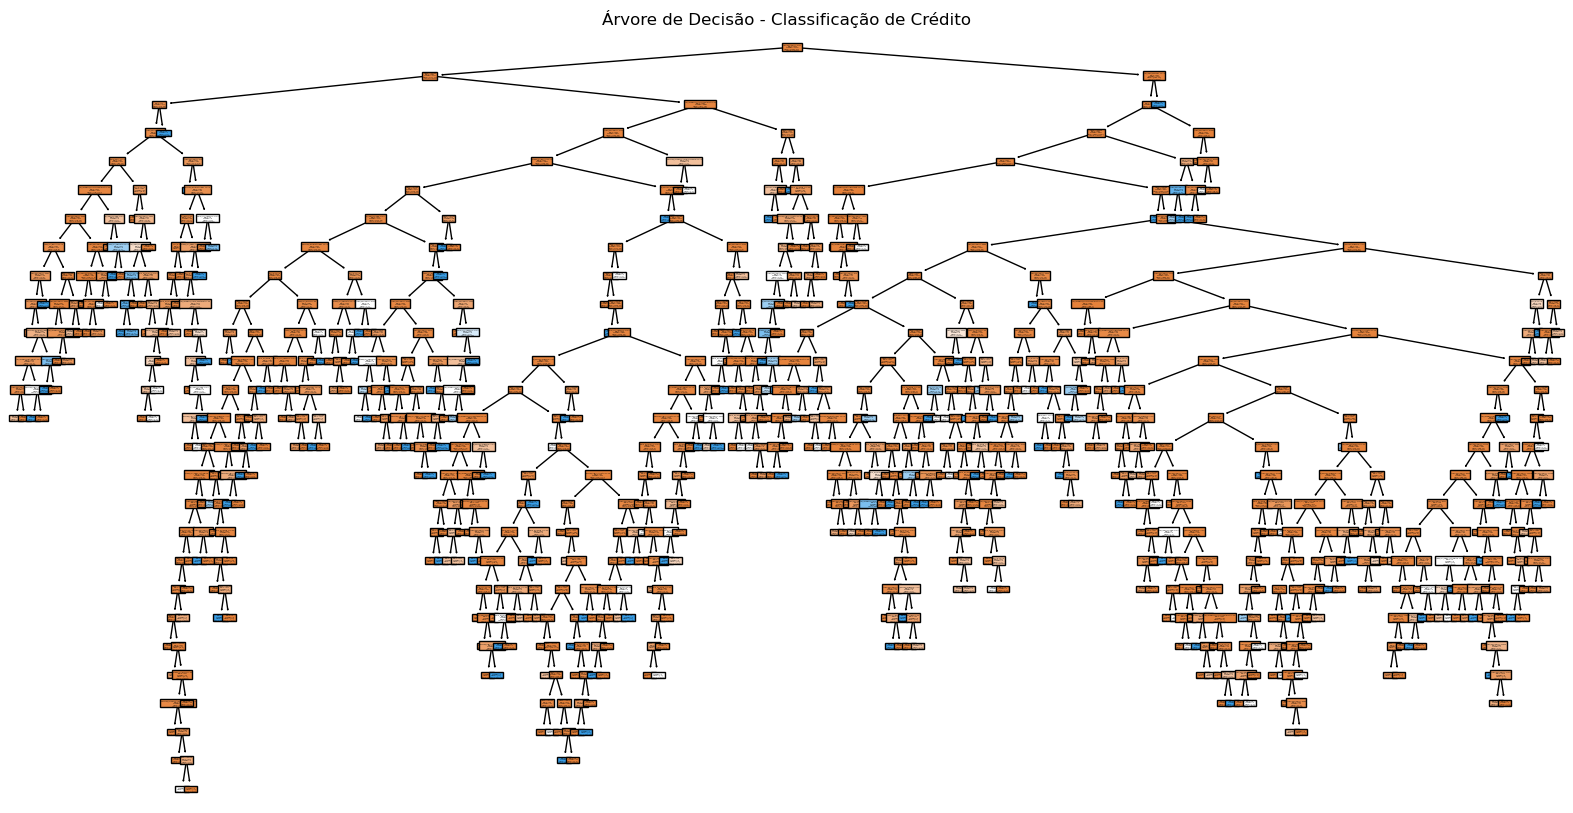

In [51]:
# 3) Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))  # aumentar o tamanho da figura
plot_tree(modelo_arvore, feature_names=X_train.columns, class_names=["aprovado", "reprovado"], filled=True)
plt.title("Árvore de Decisão - Classificação de Crédito")
plt.show()

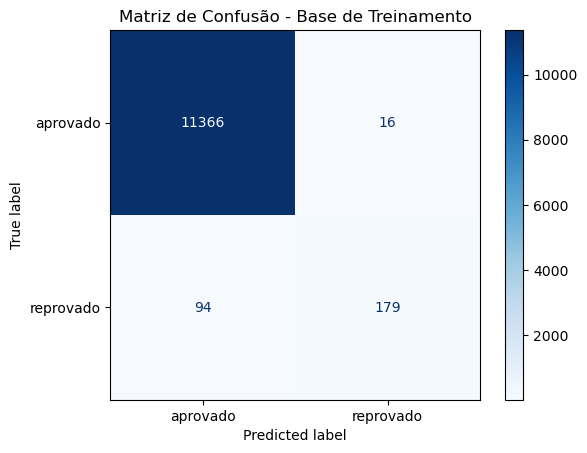

In [52]:
# 4) Gerar previsões para a base de treinamento
y_pred_train = modelo_arvore.predict(X_train)

# Criar matriz de confusão
cm = confusion_matrix(y_train, y_pred_train)

# Exibir a matriz com rótulos personalizados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovado", "reprovado"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Base de Treinamento")
plt.show()

In [55]:
# 5) Calcular acurácia na base de treinamento
acuracia_treino = accuracy_score(y_train, y_pred_train)

print(f"Acurácia na base de treinamento: {acuracia_treino:.4f}")

Acurácia na base de treinamento: 0.9906


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [56]:
# 6) Classificar a base de teste com o modelo treinado anteriormente
y_pred_valid = modelo_arvore.predict(X_valid)


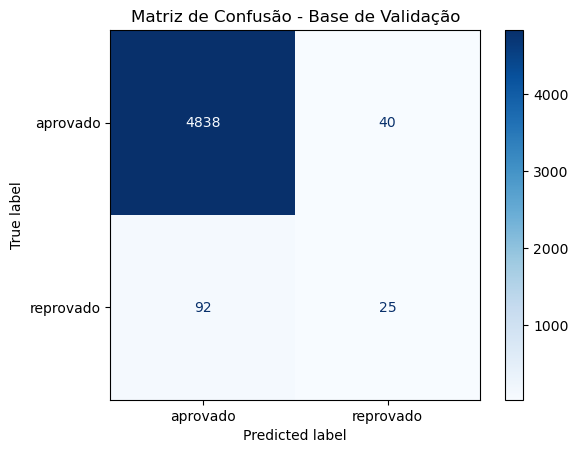

In [57]:
# 7) Matriz de confusão - base de validação
cm_valid = confusion_matrix(y_valid, y_pred_valid)

disp_valid = ConfusionMatrixDisplay(confusion_matrix=cm_valid, display_labels=["aprovado", "reprovado"])
disp_valid.plot(cmap="Blues")
plt.title("Matriz de Confusão - Base de Validação")
plt.show()

In [58]:
# 8) Calcular acurácia da base de validação
acuracia_valid = accuracy_score(y_valid, y_pred_valid)

print(f"Acurácia na base de treino: {acuracia_treino:.4f}")
print(f"Acurácia na base de validação: {acuracia_valid:.4f}")

Acurácia na base de treino: 0.9906
Acurácia na base de validação: 0.9736


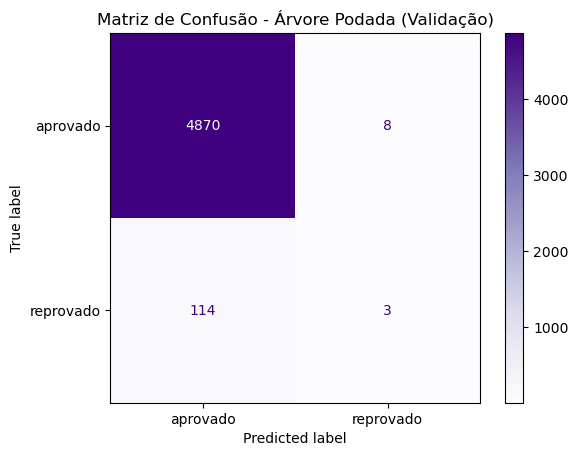

In [61]:
# 9) Novo modelo com restrições de complexidade
modelo_arvore_podada = DecisionTreeClassifier(
    min_samples_leaf=5,
    max_depth=10,
    random_state=123
)
modelo_arvore_podada.fit(X_train, y_train)

# Previsões com novo modelo
y_pred_podado = modelo_arvore_podada.predict(X_valid)

# Matriz de confusão
cm_podado = confusion_matrix(y_valid, y_pred_podado)
disp_podado = ConfusionMatrixDisplay(confusion_matrix=cm_podado, display_labels=["aprovado", "reprovado"])
disp_podado.plot(cmap="Purples")
plt.title("Matriz de Confusão - Árvore Podada (Validação)")
plt.show()

In [62]:
# 10) Proporção de classificações como 'mau' na base de validação
proporcao_maus = sum(y_pred_podado) / len(y_pred_podado)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2%}")

Proporção de proponentes classificados como 'maus': 0.22%


In [63]:
# 11) Classificar todos como "bons" (aprovado → classe 0)
y_tudo_bom = [0] * len(y_valid)

# Acurácia dessa classificação
acuracia_tudo_bom = accuracy_score(y_valid, y_tudo_bom)
print(f"Acurácia se todos fossem classificados como 'bons': {acuracia_tudo_bom:.4f}")

Acurácia se todos fossem classificados como 'bons': 0.9766


In [65]:
df.to_csv('G:/O meu disco/Meus Notebooks/demo01_salvo2.csv', index=False)
